<a href="https://colab.research.google.com/github/GabeSants/vendas_carros/blob/main/analise_vendas_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


In [11]:
uploaded = files.upload()


Saving vendas_carros.xlsx to vendas_carros (1).xlsx


In [12]:
df = pd.read_excel('vendas_carros.xlsx')
df.head(5)

,MARCA,MODELO,ANO,PREÇO,KILOMETRAGEM,QUANTIDADE VENDIDA
0,Fiat,Uno,2019,30000,50000,100
1,Ford,Focus,2018,45000,30000,50
2,Honda,Civic,2020,70000,10000,75
3,Chevrolet,Onix,2021,60000,5000,120
4,Renault,Kwid,2021,40000,15000,110


In [13]:
df["FATURAMENTO"] = df["QUANTIDADE VENDIDA"] * df["PREÇO"]

print(df["FATURAMENTO"].head(5))

0    3000000
1    2250000
2    5250000
3    7200000
4    4400000
Name: FATURAMENTO, dtype: int64


In [14]:
faturamento_por_ano = df.groupby(["ANO", "MARCA"])["FATURAMENTO"].sum().reset_index()

modelo_por_ano_marca = df.groupby(["ANO", "MARCA", "MODELO "])["QUANTIDADE VENDIDA"].sum().reset_index()
modelo_mais_vendido_por_ano_marca = modelo_por_ano_marca.loc[modelo_por_ano_marca.groupby(["ANO", "MARCA"])["QUANTIDADE VENDIDA"].idxmax()]

resultado_final = modelo_mais_vendido_por_ano_marca[["ANO", "MARCA", "MODELO ", "QUANTIDADE VENDIDA"]]

print(resultado_final.head(5))


    ANO MARCA MODELO   QUANTIDADE VENDIDA
0  2018  Ford   Focus                  50
1  2019   BMW      X1                  30
2  2019  Fiat    Argo                 120
4  2020  Audi      A3                  40
5  2020   BMW      X3                  50


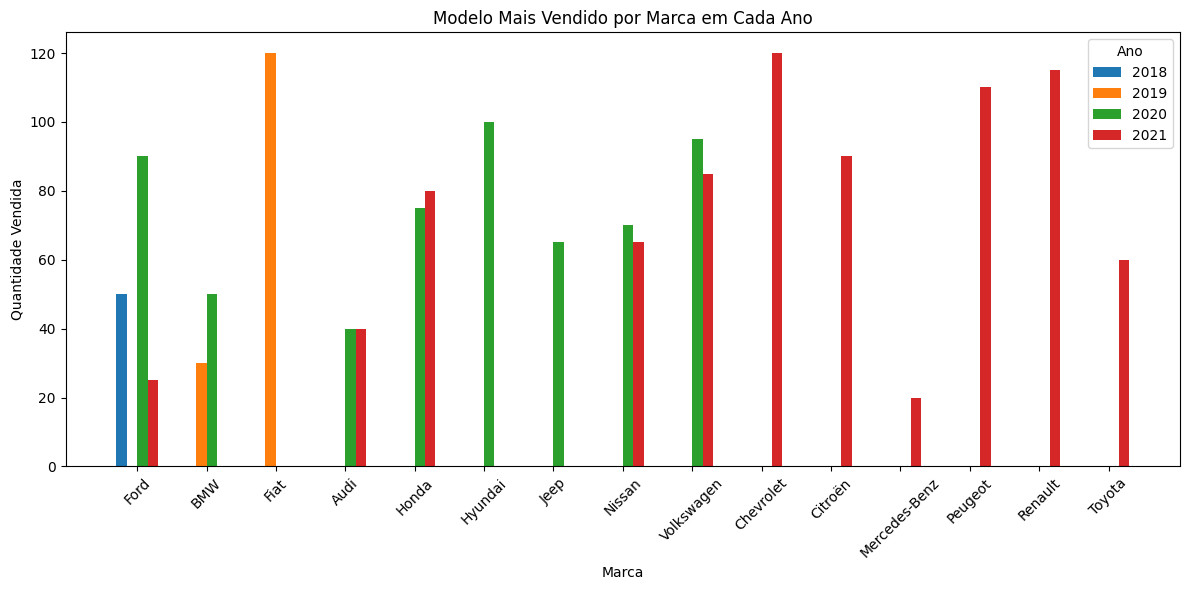

In [23]:
plt.figure(figsize=(12, 6))

marcas = resultado_final["MARCA"].unique()
anos = resultado_final["ANO"].unique()

# Defina o número de marcas e a largura das barras
num_marcas = len(marcas)
bar_width = 0.15
index = range(num_marcas)


quantidade_vendida = {ano: [] for ano in anos}

for marca in marcas:
    for ano in anos:
        qtd = resultado_final[(resultado_final["MARCA"] == marca) & (resultado_final["ANO"] == ano)]
        quantidade_vendida[ano].append(qtd["QUANTIDADE VENDIDA"].values[0] if not qtd.empty else 0)

# Criar as barras para cada ano
for i, ano in enumerate(anos):
    plt.bar([x + i * bar_width for x in index], quantidade_vendida[ano], width=bar_width, label=ano)

# Configurações do gráfico
plt.title("Modelo Mais Vendido por Marca em Cada Ano")
plt.xlabel("Marca")
plt.ylabel("Quantidade Vendida")
plt.xticks([x + bar_width * (len(anos) - 1) / 2 for x in index], marcas, rotation=45)
plt.tight_layout()
plt.legend(title="Ano")
plt.show()
